<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_21_hypothesis_testing_house_age_rooms_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hypothesis Testing: Number of Rooms and House Age vs. Median House Values

#### **Objective**
I investigated how **average number of rooms** and **house age** influence **median house values** in California. The goal was to determine if these features have a statistically significant impact on house values and to quantify the differences between groups.

---

### **Tests Conducted and Results**

#### **1. Average Number of Rooms and House Values**
   - **Hypotheses:**
     - Null Hypothesis ((H₀)): The median house values of houses with fewer rooms and more rooms are equal.
     - Alternative Hypothesis ((H₁)): The median house values of houses with fewer rooms and more rooms are significantly different.
   - **Methodology:**
     - Data split into two groups: **Low Room Count** (≤ median) and **High Room Count** (> median).
     - **Levene’s Test** for variance equality.
     - **Welch’s T-Test** to compare group means due to unequal variances.
   - **Results:**
     - **Levene’s Test:** Variances differed significantly (p < 0.05).
     - **Welch’s T-Test:** Significant difference in means (p < 0.05). Houses with more rooms had higher median values.
   - **Visualization:**
     - Boxplots and KDE plots highlighted the stark difference in house value distributions between the two groups.

---

#### **2. House Age and House Values (Two Groups)**
   - **Hypotheses:**
     - Null Hypothesis ((H₀)): The median house values of younger houses (≤ median age) and older houses (> median age) are equal.
     - Alternative Hypothesis ((H₁)): The median house values of younger and older houses are significantly different.
   - **Methodology:**
     - Data split into **Younger Houses** and **Older Houses** based on median age.
     - **Levene’s Test** for variance equality.
     - **Welch’s T-Test** to compare group means due to unequal variances.
   - **Results:**
     - **Levene’s Test:** Variances differed significantly (p < 0.05).
     - **Welch’s T-Test:** Significant difference in means (p < 0.05). Older houses had higher median house values.

---

#### **3. House Age and House Values (Quartiles)**
   - **Hypotheses:**
     - Null Hypothesis ((H₀)): The median house values across the four house age quartiles are equal.
     - Alternative Hypothesis ((H₁)): At least one quartile has a significantly different median house value.
   - **Methodology:**
     - Data split into four quartiles based on house age.
     - **One-Way ANOVA** to test for overall mean differences.
     - **Tukey’s HSD Post-Hoc Test** for pairwise comparisons between quartiles.
   - **Results:**
     - **ANOVA:** Significant differences in means across quartiles (p < 0.05).
     - **Tukey’s HSD:**
       - Q1 (youngest houses) had significantly lower values than Q2, Q3, and Q4 (oldest houses).
       - Q4 had the highest median house values overall.

---

### **Key Findings**
1. **Number of Rooms:**
   - Houses with more rooms (> median) have significantly higher median house values than those with fewer rooms (≤ median).

2. **House Age (Two Groups):**
   - Older houses (> median age) tend to have significantly higher median house values compared to younger houses.

3. **House Age (Quartiles):**
   - Median house values increase progressively from younger to older houses, with the largest differences between Q1 (youngest) and Q4 (oldest).

4. **Variance Differences:**
   - Both analyses revealed significant variance differences between groups, emphasizing the importance of group-specific statistical methods.

---

### **Conclusion**
My analyses confirms that both **number of rooms** and **house age** are strong predictors of median house values. Houses with more rooms and older houses tend to have significantly higher values, highlighting their influence in housing market dynamics. These insights are critical for data-driven decision-making in real estate pricing and predictive modeling.

### Load California Housing Dataset

In [65]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load California Housing dataset from sklearn
california_data = fetch_california_housing(as_frame=True)

# Convert to DataFrame
df = california_data.frame

# Display dataset information
print("California Housing Dataset Info:")
df.info()

California Housing Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Distribution Plots


Unique Values in Numeric Columns:
AveBedrms: 14233 unique values
AveOccup: 18841 unique values
AveRooms: 19392 unique values
HouseAge: 52 unique values
MedHouseVal: 3842 unique values
MedInc: 12928 unique values
Population: 3888 unique values


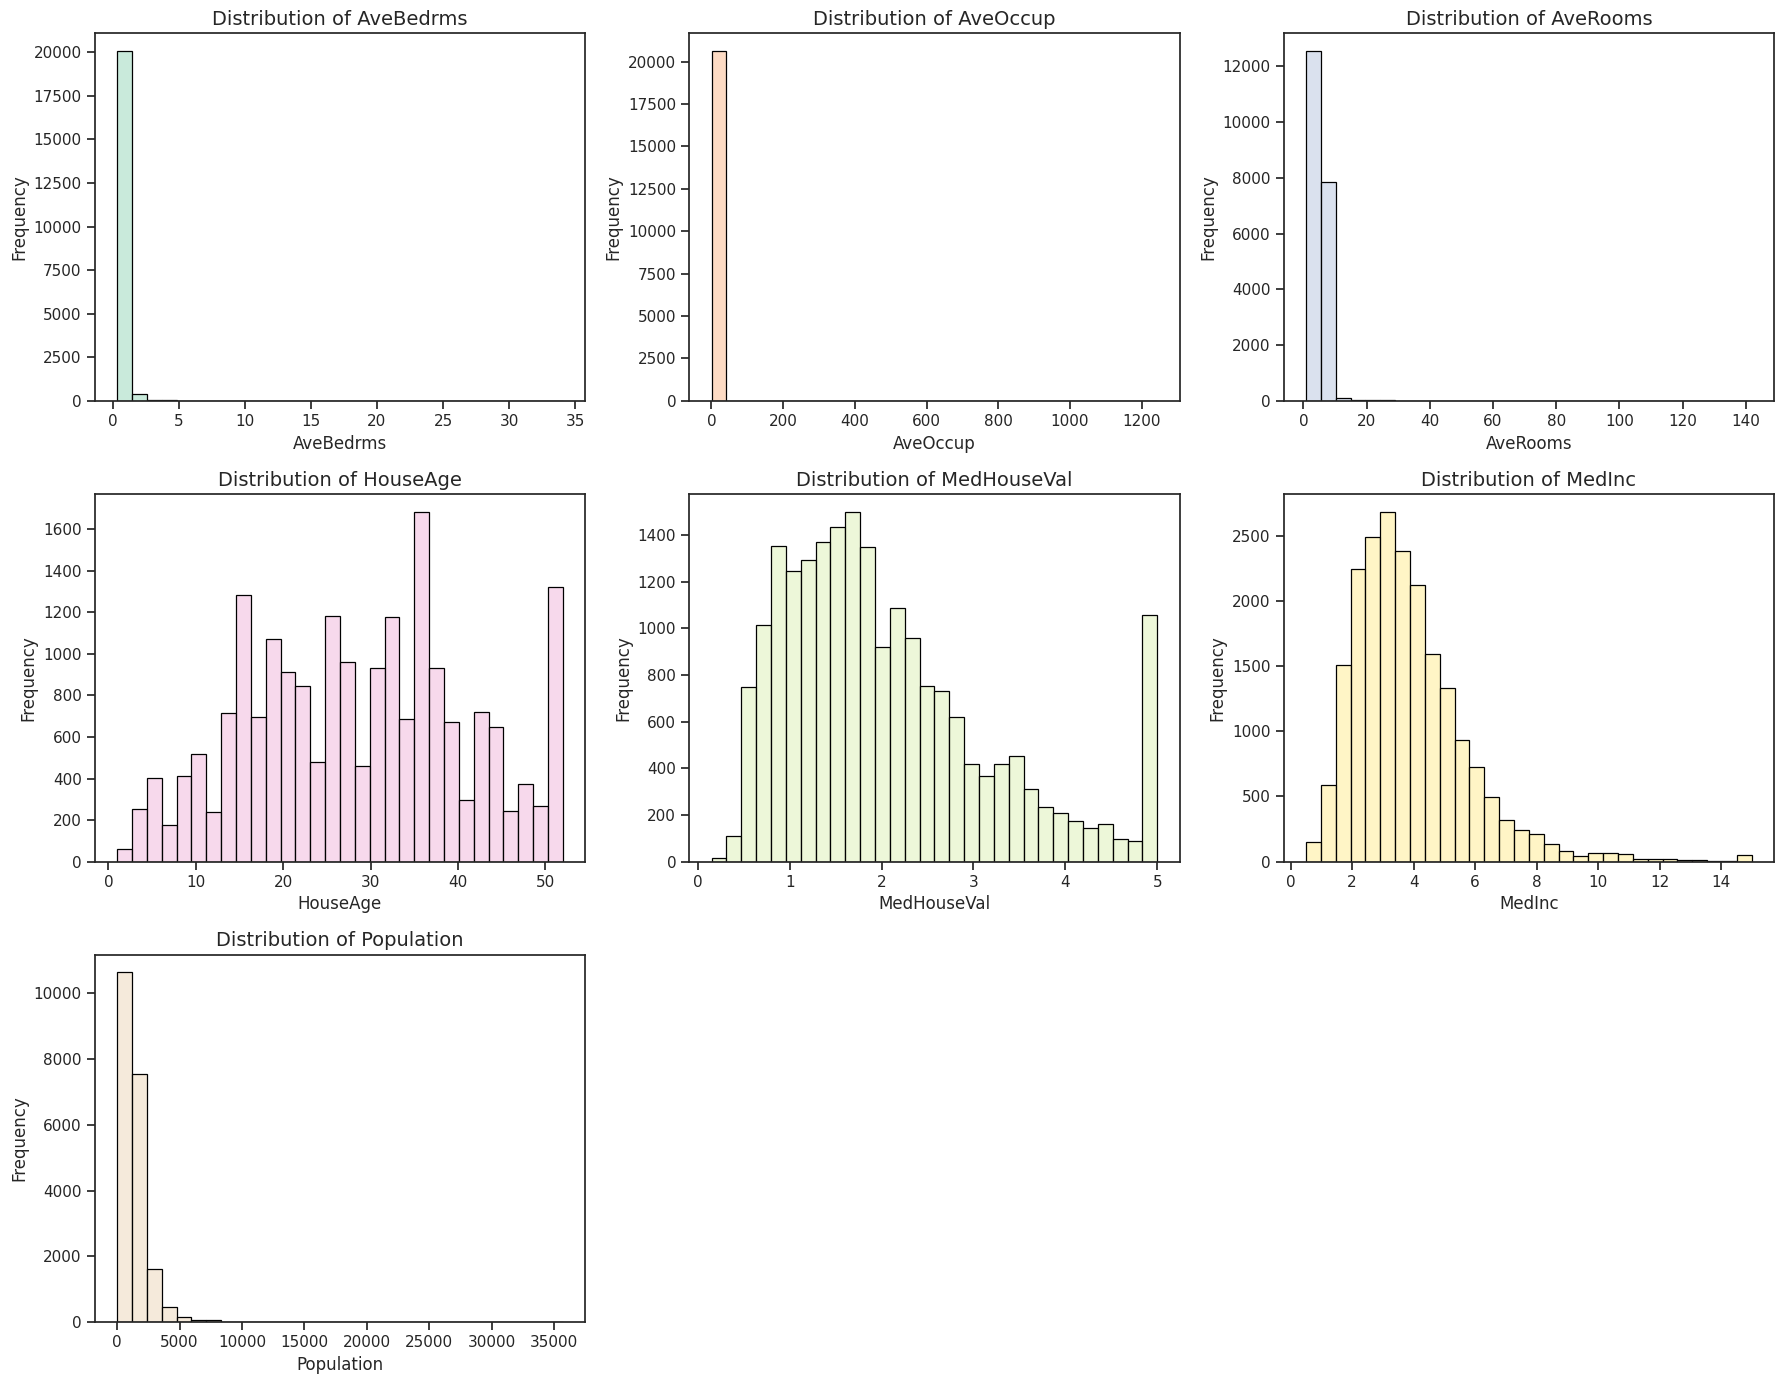


Summary Statistics for Numeric Columns:


,AveBedrms,AveOccup,AveRooms,HouseAge,MedHouseVal,MedInc,Population
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1.096675,3.070655,5.429000,28.639486,2.068558,3.870671,1425.476744
std,0.473911,10.386050,2.474173,12.585558,1.153956,1.899822,1132.462122
min,0.333333,0.692308,0.846154,1.000000,0.149990,0.499900,3.000000
25%,1.006079,2.429741,4.440716,18.000000,1.196000,2.563400,787.000000
50%,1.048780,2.818116,5.229129,29.000000,1.797000,3.534800,1166.000000
75%,1.099526,3.282261,6.052381,37.000000,2.647250,4.743250,1725.000000
max,34.066667,1243.333333,141.909091,52.000000,5.000010,15.000100,35682.000000


In [64]:
# Exclude 'longitude' and 'latitude' from analysis
numeric_columns = df.select_dtypes(include='number').columns.difference(['Longitude', 'Latitude'])

# Define a color palette for the plots
colors = sns.color_palette("Pastel2", n_colors=len(numeric_columns))

# Step 1: Count unique values for each numeric column
print("\nUnique Values in Numeric Columns:")
for col in numeric_columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

# Step 2: Visualize distributions of numeric columns
plt.figure(figsize=(18, 14))
for i, (col, color) in enumerate(zip(numeric_columns, colors), 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid to fit all plots
    sns.histplot(df[col], kde=False, bins=30, color=color, edgecolor="k", alpha=0.7)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

# Final adjustments for the layout
plt.tight_layout()
plt.show()

# Step 3: Summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
df[numeric_columns].describe()

#### Average Number of Rooms?

It's a bit unusual to work with averages like `AveBedrms`, `AveOccup`, and `AveRooms`, but they can still be meaningful if analyzed carefully. Here's a breakdown of how we could approach them and decide if they're good candidates for hypothesis testing:

---

### Why are these averages, and how can we interpret them?
1. **What the averages represent**:
   - `AveBedrms` is the average number of bedrooms per household in a block group.
   - `AveOccup` is the average number of occupants per household.
   - `AveRooms` is the average number of rooms per household.

   These metrics are designed to provide a summary of housing conditions in each block group, but they don't represent individual houses.

2. **Why this matters**:
   - These are continuous variables, so they are appropriate for statistical tests that deal with means and distributions.
   - However, we must be cautious in interpreting these averages because they may be influenced by outliers or unusual distributions (e.g., a few extremely large households could skew `AveOccup`).



#### Handling Outliers

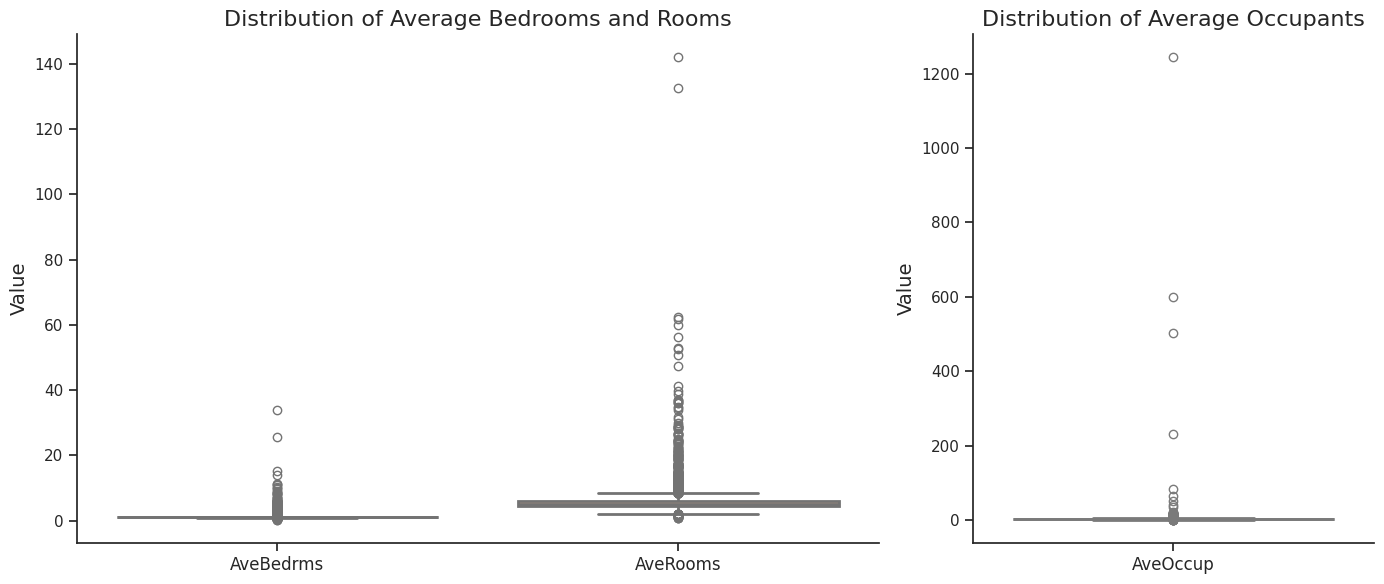

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme(style="ticks", palette="Pastel1_r", context="notebook")

# Create the 1x2 grid for boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={"width_ratios": [2, 1]})

# Plot AveBedrms and AveRooms in the first chart
sns.boxplot(data=df[['AveBedrms', 'AveRooms']], palette="pastel", linewidth=2, ax=axes[0], showfliers=True)
axes[0].set_title("Distribution of Average Bedrooms and Rooms", fontsize=16)
axes[0].set_ylabel("Value", fontsize=14)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["AveBedrms", "AveRooms"], fontsize=12)

# Plot AveOccup in the second chart
sns.boxplot(data=df[['AveOccup']], palette="pastel", linewidth=2, ax=axes[1], showfliers=True)
axes[1].set_title("Distribution of Average Occupants", fontsize=16)
axes[1].set_ylabel("Value", fontsize=14)
axes[1].set_xticks([0])
axes[1].set_xticklabels(["AveOccup"], fontsize=12)

# Final adjustments
sns.despine()
plt.tight_layout()
plt.show()



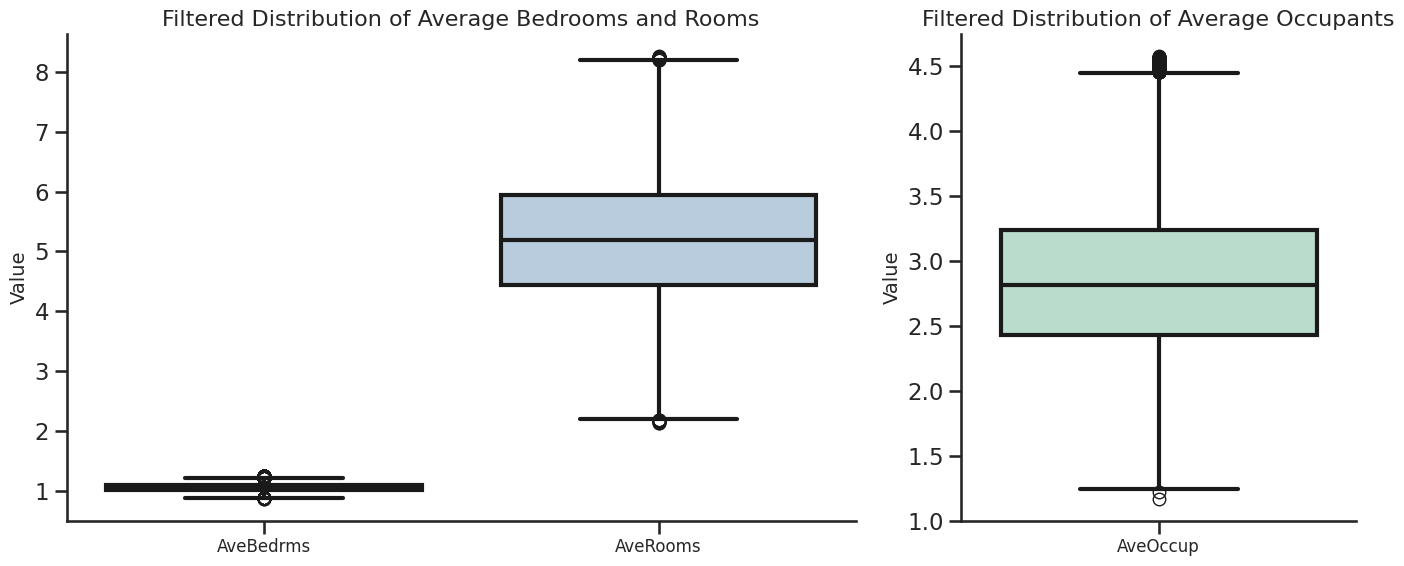

In [73]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply the function to each column
filtered_df = df.copy()
for column in ['AveBedrms', 'AveRooms', 'AveOccup']:
    filtered_df = remove_outliers_iqr(filtered_df, column)

# Set Seaborn theme
sns.set_theme(style="ticks", palette="Pastel1_r", context="talk")

# Create the 1x2 grid for boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={"width_ratios": [2, 1]})

# Plot filtered AveBedrms and AveRooms in the first chart
sns.boxplot(data=filtered_df[['AveBedrms', 'AveRooms']], palette="Pastel1", linewidth=3, linecolor='k', ax=axes[0])
axes[0].set_title("Filtered Distribution of Average Bedrooms and Rooms", fontsize=16)
axes[0].set_ylabel("Value", fontsize=14)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["AveBedrms", "AveRooms"], fontsize=12)

# Plot filtered AveOccup in the second chart
sns.boxplot(data=filtered_df[['AveOccup']], palette="Pastel2", linewidth=3, linecolor='k', ax=axes[1])
axes[1].set_title("Filtered Distribution of Average Occupants", fontsize=16)
axes[1].set_ylabel("Value", fontsize=14)
axes[1].set_xticks([0])
axes[1].set_xticklabels(["AveOccup"], fontsize=12)

# Final adjustments
sns.despine()
plt.tight_layout()
plt.show()



#### **Binning (Categorical Analysis)**
- **When to Use**:
  - If you want to compare **specific age groups** (e.g., young vs. old houses) and their associated house values.
  - If the relationship between variables may not be linear and is easier to interpret as categorical data.
  - If the hypothesis involves group-level comparisons (e.g., mean house values between bins).
- **Advantages**:
  - Simplifies analysis by reducing continuous data into interpretable groups.
  - Ideal for visualizations like **barplots**, **boxplots**, or **ANOVA**.
- **Example Hypothesis**: "Are houses built over 50 years ago valued significantly less than newer houses?"

---

### **Continuous Data (Correlation/Regression)**
- **When to Use**:
  - If you are interested in understanding the **precise relationship** between house age and house value.
  - If you suspect a linear or nonlinear relationship and want to quantify the strength and direction.
- **Advantages**:
  - Retains all information without simplifying or discarding data.
  - Allows for tests like **correlation analysis** or regression to evaluate the exact nature of the relationship.
- **Example Hypothesis**: "Does house age negatively correlate with house value?"

---

### Recommendation:
- **Binning**: If you're comparing groups of houses (e.g., young vs. old).
- **Continuous**: If you're exploring whether house age affects house value (e.g., correlation or regression).


Testing the relationship between `AveRooms` (average number of rooms per household) and `MedHouseVal` (median house value) can help us understand whether the number of rooms is a significant factor influencing housing prices.


## Hypothesis: House Value by Rooms
**Question:** Does the median house value differ significantly between houses with a high average number of rooms and those with a low average number of rooms?

1. **Null Hypothesis (\(H_0\)):**
   - The median house value is the same for houses with high and low average room counts.

2. **Alternative Hypothesis (\(H_1\)):**
   - The median house value differs significantly for houses with high and low average room counts.

### Steps:
1. **Binning `AveRooms`:**
   - Create two categories:
     - **Low Room Count:** Houses with `AveRooms` below the median.
     - **High Room Count:** Houses with `AveRooms` above the median.

2. **Variance Test:**
   - Use **Levene's Test** to check for equality of variances between the two groups.

3. **Means Comparison:**
   - Depending on the result of the variance test:
     - If variances are equal: Perform a **two-sample t-test**.
     - If variances are unequal: Perform a **Welch’s t-test**.

4. **Visualization:**
   - Create boxplots or KDE plots to visualize the differences between the groups.




### Bin Room Data - Levene Test

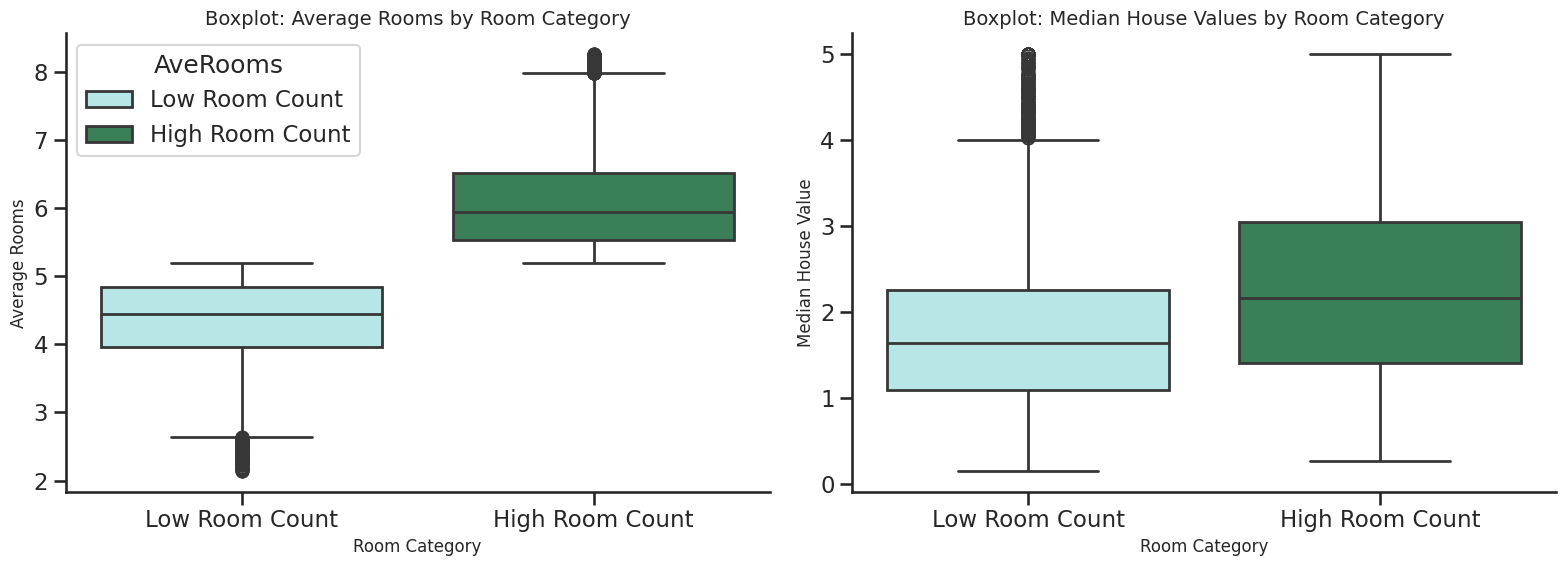

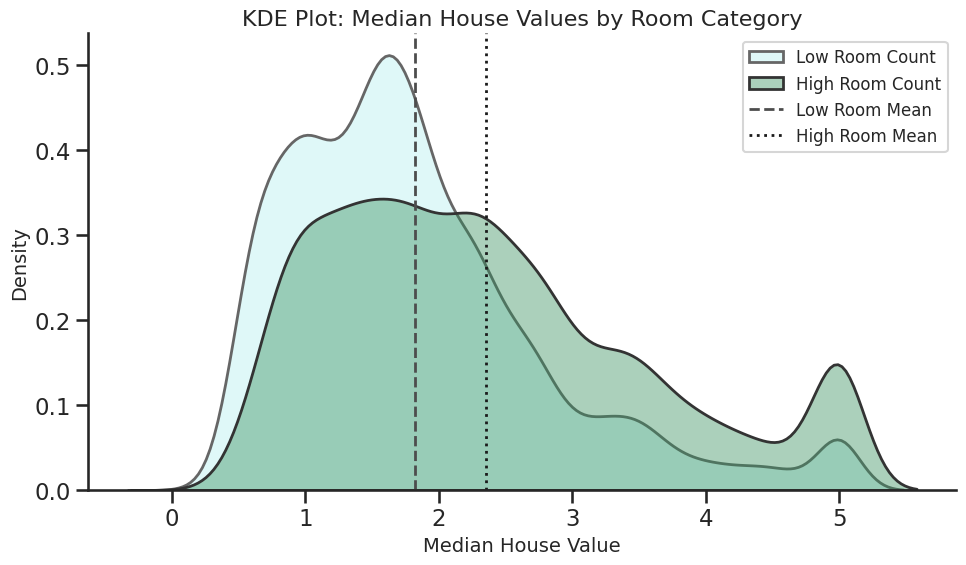

In [152]:
# Enhanced Boxplot and KDE Plot for Room Count
plt.figure(figsize=(16, 6))

# Bin the data based on room count
room_bins = pd.cut(
    filtered_df['AveRooms'],
    bins=[filtered_df['AveRooms'].min(), median_rooms, filtered_df['AveRooms'].max()],
    labels=['Low Room Count', 'High Room Count']
)

# Boxplot for Room Count Bins
plt.subplot(1, 2, 1)
sns.boxplot(
    data=filtered_df,
    x=room_bins, hue=room_bins,  # Using room_bins for both x and hue
    y="AveRooms",
    palette=["paleturquoise", "seagreen"],
    linewidth=2
)
plt.title("Boxplot: Average Rooms by Room Category", fontsize=14)
plt.xlabel("Room Category", fontsize=12)
plt.ylabel("Average Rooms", fontsize=12)

# Boxplot for Median House Values
plt.subplot(1, 2, 2)
sns.boxplot(
    data=filtered_df,
    x=room_bins, hue=room_bins,  # Using room_bins for both x and hue
    y="MedHouseVal",
    palette=["paleturquoise", "seagreen"],
    linewidth=2, legend=False
)
plt.title("Boxplot: Median House Values by Room Category", fontsize=14)
plt.xlabel("Room Category", fontsize=12)
plt.ylabel("Median House Value", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

# KDE Plot for Median House Values with Mean Lines
plt.figure(figsize=(10, 6))

# KDE Plots
sns.kdeplot(low_room_values, fill=True, alpha=0.4, label="Low Room Count", color="paleturquoise", linewidth=2, edgecolor="0.4")
sns.kdeplot(high_room_values, fill=True, alpha=0.4, label="High Room Count", color="seagreen", linewidth=2, edgecolor="0.2")

# Add Mean Lines
plt.axvline(x=low_room_values.mean(), color="0.3", linestyle="--", linewidth=2, label="Low Room Mean")
plt.axvline(x=high_room_values.mean(), color="0.1", linestyle=":", linewidth=2, label="High Room Mean")

# Customize the Plot
plt.title("KDE Plot: Median House Values by Room Category", fontsize=16)
plt.xlabel("Median House Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


In [119]:
from scipy.stats import levene, ttest_ind

# Define groups based on the median
median_rooms = filtered_df['AveRooms'].median()

low_room_group = filtered_df[filtered_df['AveRooms'] <= median_rooms]
high_room_group = filtered_df[filtered_df['AveRooms'] > median_rooms]

# Extract median house values for both groups
low_room_values = low_room_group['MedHouseVal']
high_room_values = high_room_group['MedHouseVal']


# Combine data directly from the groups
room_categories = ['Low Room Count'] * len(low_room_values) + ['High Room Count'] * len(high_room_values)
median_values = list(low_room_values) + list(high_room_values)

# Perform Levene's Test for Equality of Variances
levene_stat, levene_p_value = levene(low_room_values, high_room_values)

# Perform Welch's T-Test for Equality of Means
t_stat, p_value = ttest_ind(low_room_values, high_room_values, equal_var=False)

# Output results
print("Levene's Test for Equality of Variances:")
print(f"Test Statistic: {levene_stat:.2f}")
print(f"P-Value: {levene_p_value:.4f}")
if levene_p_value <= 0.05:
    print("Conclusion: Reject the null hypothesis. Variances differ significantly.")
else:
    print("Conclusion: Fail to reject the null hypothesis. Variances are not significantly different.")

print("\nWelch's T-Test Results:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
if p_value <= 0.05:
    print("Conclusion: Reject the null hypothesis. Median house values differ significantly between the two groups.\n\n")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median house values between the two groups.\n\n")


Levene's Test for Equality of Variances:
Test Statistic: 446.99
P-Value: 0.0000
Conclusion: Reject the null hypothesis. Variances differ significantly.

Welch's T-Test Results:
T-Statistic: -32.48
P-Value: 0.0000
Conclusion: Reject the null hypothesis. Median house values differ significantly between the two groups.




### Results Interpretation

#### Levene's Test:
- **Test Statistic**: 446.99
- **P-Value**: 0.0000
- **Conclusion**: The variances of median house values between the "Low Room Count" and "High Room Count" groups are significantly different. This suggests that the spread of house prices is not consistent across the two groups.

#### Welch's T-Test:
- **T-Statistic**: -32.48
- **P-Value**: 0.0000
- **Conclusion**: The negative T-statistic indicates that the "Low Room Count" group has a significantly lower mean house value compared to the "High Room Count" group. Since the p-value is far below the significance threshold (0.05), we reject the null hypothesis, confirming that the difference in median house values is statistically significant.

---

### Key Insights:
1. **Variances Differ**: The significant result from Levene's Test highlights that house values for the two groups have varying levels of spread, reinforcing the need for Welch's T-Test, which is robust to unequal variances.
   
2. **Significant Mean Difference**: The Welch's T-Test confirms that there is a notable difference in mean house prices, with "High Room Count" houses generally being more expensive than "Low Room Count" houses.

3. **Practical Implications**:
   - Higher room counts are associated with higher house prices.
   - These findings could be relevant for predicting house values, understanding housing market segmentation, or guiding real estate investments.




## Hypothesis: House Value by Age
- **Null Hypothesis (\(H_0\))**: Median house values are the same for younger and older houses.
- **Alternative Hypothesis (\(H_1\))**: Median house values differ between younger and older houses.





In [153]:
# Calculate the median house age
median_age = filtered_df['HouseAge'].median()

# Define groups: younger and older houses
young_houses = filtered_df[filtered_df['HouseAge'] <= median_age]
old_houses = filtered_df[filtered_df['HouseAge'] > median_age]

# Extract median house values for both groups
young_house_values = young_houses['MedHouseVal']
old_house_values = old_houses['MedHouseVal']

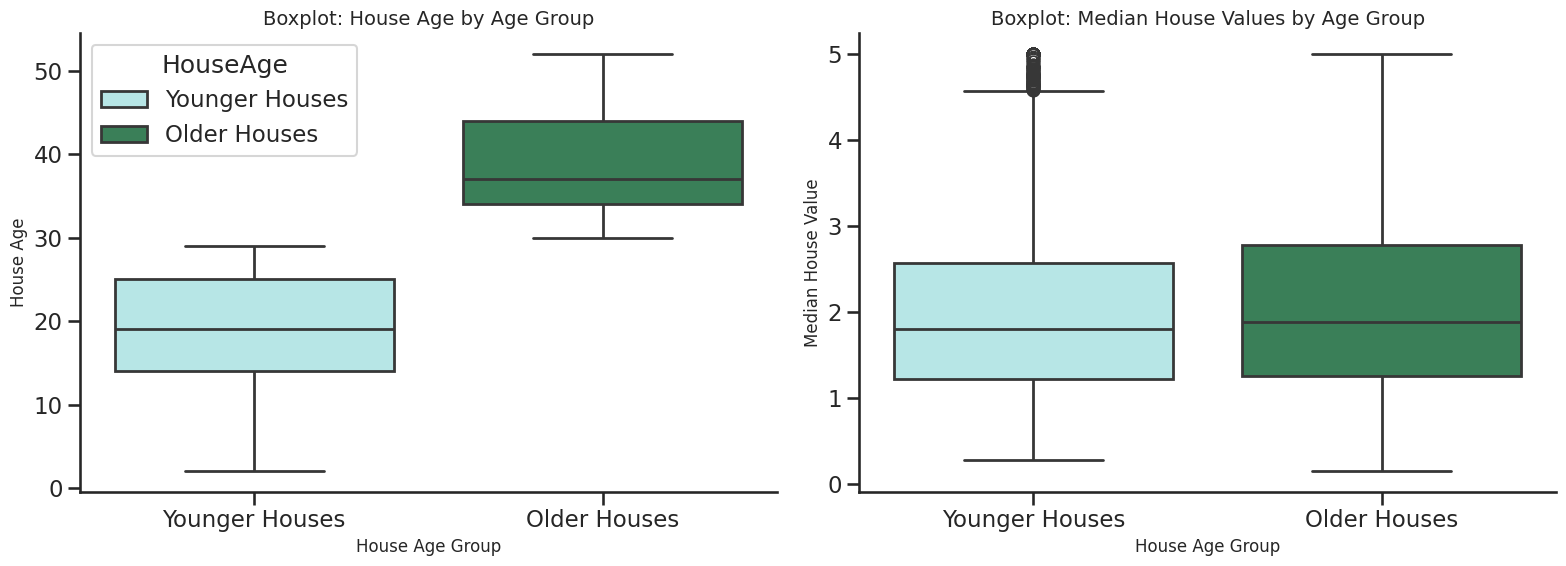

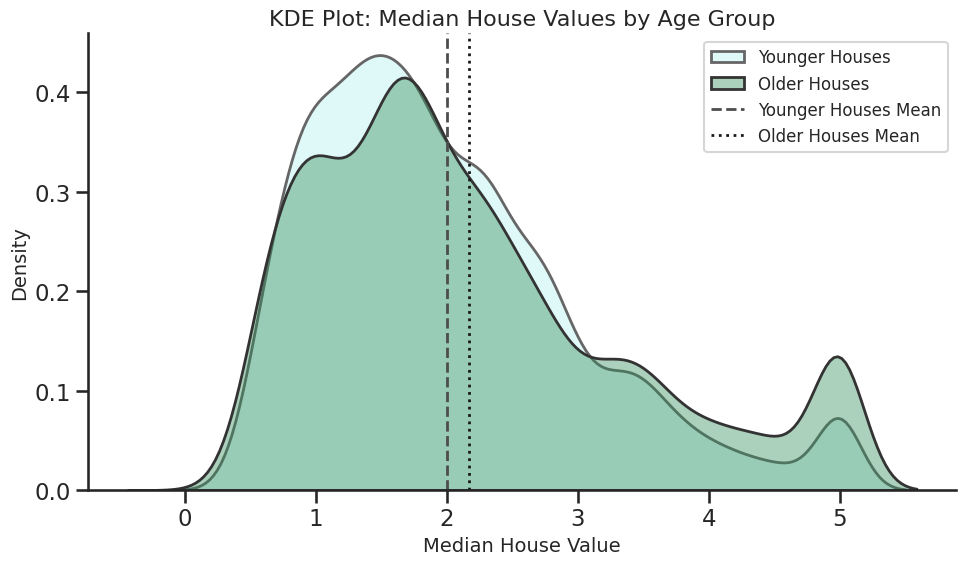

In [115]:
# Enhanced Boxplot and KDE Plot for HouseAge
plt.figure(figsize=(16, 6))

x=pd.cut(
        filtered_df['HouseAge'],
        bins=[filtered_df['HouseAge'].min(), median_age, filtered_df['HouseAge'].max()],
        labels=['Younger Houses', 'Older Houses']
    )

# Boxplot for House Age Bins
plt.subplot(1, 2, 1)
sns.boxplot(
    data=filtered_df,
    x=x, hue=x,
    y="HouseAge",
    palette=["paleturquoise", "seagreen"],
    linewidth=2
)
plt.title("Boxplot: House Age by Age Group", fontsize=14)
plt.xlabel("House Age Group", fontsize=12)
plt.ylabel("House Age", fontsize=12)

x = pd.cut(
        filtered_df['HouseAge'],
        bins=[filtered_df['HouseAge'].min(), median_age, filtered_df['HouseAge'].max()],
        labels=['Younger Houses', 'Older Houses']
    )

# Boxplot for Median House Values
plt.subplot(1, 2, 2)
sns.boxplot(
    data=filtered_df,
    x=x, hue=x, legend=False,
    y="MedHouseVal",
    palette=["paleturquoise", "seagreen"],
    linewidth=2
)
plt.title("Boxplot: Median House Values by Age Group", fontsize=14)
plt.xlabel("House Age Group", fontsize=12)
plt.ylabel("Median House Value", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

# KDE Plot for Median House Values with Mean Lines
plt.figure(figsize=(10, 6))

# KDE Plots
sns.kdeplot(young_house_values, fill=True, alpha=0.4, label="Younger Houses", color="paleturquoise", linewidth=2, edgecolor="0.4")
sns.kdeplot(old_house_values, fill=True, alpha=0.4, label="Older Houses", color="seagreen", linewidth=2, edgecolor="0.2")

# Add Mean Lines
plt.axvline(x=young_house_values.mean(), color="0.3", linestyle="--", linewidth=2, label="Younger Houses Mean")
plt.axvline(x=old_house_values.mean(), color="0.1", linestyle=":", linewidth=2, label="Older Houses Mean")

# Customize the Plot
plt.title("KDE Plot: Median House Values by Age Group", fontsize=16)
plt.xlabel("Median House Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


In [122]:
from scipy.stats import levene, ttest_ind

# Levene's Test for equality of variances
levene_stat, levene_p = levene(young_house_values, old_house_values)

# Welch's T-Test (assuming unequal variances)
t_stat, p_value = ttest_ind(young_house_values, old_house_values, equal_var=False)

# Output results
print("Levene's Test for Equality of Variances:")
print(f"Test Statistic: {levene_stat:.2f}")
print(f"P-Value: {levene_p:.4f}")
print("Conclusion:", "Reject the null hypothesis. Variances differ significantly." if levene_p <= 0.05 else "Fail to reject the null hypothesis. Variances are not significantly different.")

print("\nWelch's T-Test Results:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print("Conclusion:", "Reject the null hypothesis. Median house values differ significantly between the two groups." if p_value <= 0.05 else "Fail to reject the null hypothesis. No significant difference in median house values between the two groups.")

# Additional Descriptive Statistics
print("\nDescriptive Statistics:")
print(f"Young Houses Mean: {young_house_values.mean():.2f}, Std: {young_house_values.std():.2f}")
print(f"Old Houses Mean: {old_house_values.mean():.2f}, Std: {old_house_values.std():.2f}")

Levene's Test for Equality of Variances:
Test Statistic: 138.84
P-Value: 0.0000
Conclusion: Reject the null hypothesis. Variances differ significantly.

Welch's T-Test Results:
T-Statistic: -10.07
P-Value: 0.0000
Conclusion: Reject the null hypothesis. Median house values differ significantly between the two groups.

Descriptive Statistics:
Young Houses Mean: 2.00, Std: 1.04
Old Houses Mean: 2.17, Std: 1.21


### ANOVA

Age_Quartile
Q1 (Youngest)    4981
Q3               4548
Q4 (Oldest)      4490
Q2               4309
Name: count, dtype: int64





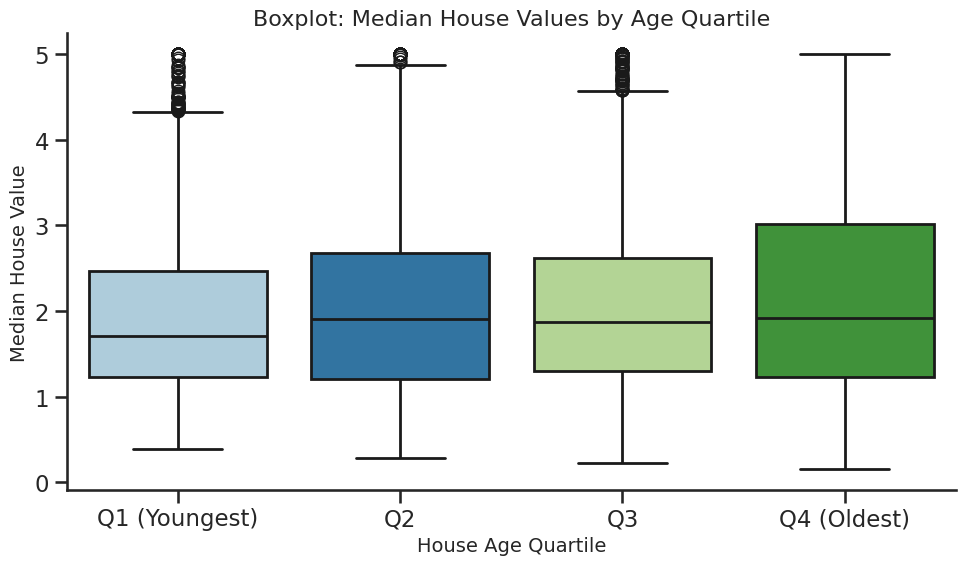

One-Way ANOVA Results:
F-Statistic: 58.21
P-Value: 0.0000


In [138]:
from scipy.stats import f_oneway

# Define quartiles
filtered_df['Age_Quartile'] = pd.qcut(
    filtered_df['HouseAge'], q=4, labels=["Q1 (Youngest)", "Q2", "Q3", "Q4 (Oldest)"]
)

# Confirm the quartiles
print(filtered_df['Age_Quartile'].value_counts())
print('\n\n')


# Extract median house values for each quartile
q1_values = filtered_df[filtered_df['Age_Quartile'] == "Q1 (Youngest)"]['MedHouseVal']
q2_values = filtered_df[filtered_df['Age_Quartile'] == "Q2"]['MedHouseVal']
q3_values = filtered_df[filtered_df['Age_Quartile'] == "Q3"]['MedHouseVal']
q4_values = filtered_df[filtered_df['Age_Quartile'] == "Q4 (Oldest)"]['MedHouseVal']

# Boxplot for Median House Values by Age Quartile
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Age_Quartile', y='MedHouseVal', hue="Age_Quartile", palette="Paired", linewidth=2, linecolor='k')
plt.title("Boxplot: Median House Values by Age Quartile", fontsize=16)
plt.xlabel("House Age Quartile", fontsize=14)
plt.ylabel("Median House Value", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

# Perform One-Way ANOVA
anova_stat, anova_p = f_oneway(q1_values, q2_values, q3_values, q4_values)

# Output results
print("One-Way ANOVA Results:")
print(f"F-Statistic: {anova_stat:.2f}")
print(f"P-Value: {anova_p:.4f}")

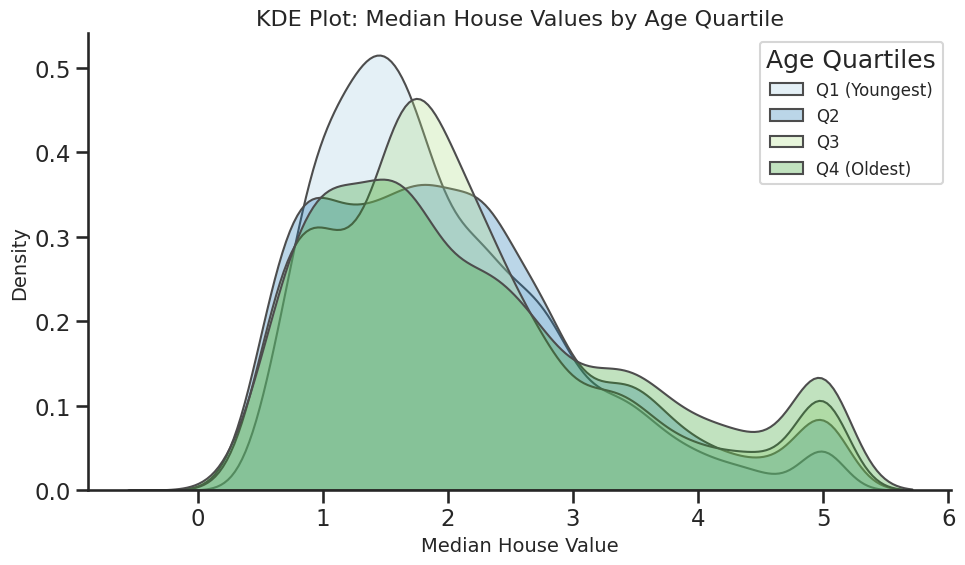

In [143]:
# KDE Overlay Plot for Age Quartiles
plt.figure(figsize=(10, 6))
for quartile, color in zip(["Q1 (Youngest)", "Q2", "Q3", "Q4 (Oldest)"], sns.color_palette("Paired", 4)):
    sns.kdeplot(filtered_df[filtered_df['Age_Quartile'] == quartile]['MedHouseVal'],
                fill=True, alpha=0.3, label=quartile, color=color, edgecolor="0.3")
plt.title("KDE Plot: Median House Values by Age Quartile", fontsize=16)
plt.xlabel("Median House Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title="Age Quartiles", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()



### Results Interpretation of One-Way ANOVA

#### Key Metrics:
1. **F-Statistic: 58.21**
   - This indicates that the variance between the means of the four age quartiles (Q1, Q2, Q3, Q4) is much larger than the variance within the groups.
   - A high F-statistic suggests a strong difference among the group means.

2. **P-Value: 0.0000**
   - The p-value is significantly less than the standard threshold of 0.05, meaning we reject the null hypothesis.
   - **Conclusion**: There is a statistically significant difference in median house values across the four house age quartiles.






### Post Hoc Analysis

In [145]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey’s HSD test
tukey_results = pairwise_tukeyhsd(
    endog=filtered_df['MedHouseVal'],    # Dependent variable
    groups=filtered_df['Age_Quartile'], # Independent variable
    alpha=0.05                          # Significance level
)

# Output results
print(tukey_results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
    group1       group2   meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
Q1 (Youngest)          Q2   0.1434    0.0  0.0834 0.2034   True
Q1 (Youngest)          Q3   0.1652    0.0   0.106 0.2243   True
Q1 (Youngest) Q4 (Oldest)   0.3043    0.0  0.2449 0.3637   True
           Q2          Q3   0.0218 0.7987 -0.0396 0.0831  False
           Q2 Q4 (Oldest)   0.1609    0.0  0.0994 0.2224   True
           Q3 Q4 (Oldest)   0.1391    0.0  0.0784 0.1998   True
---------------------------------------------------------------


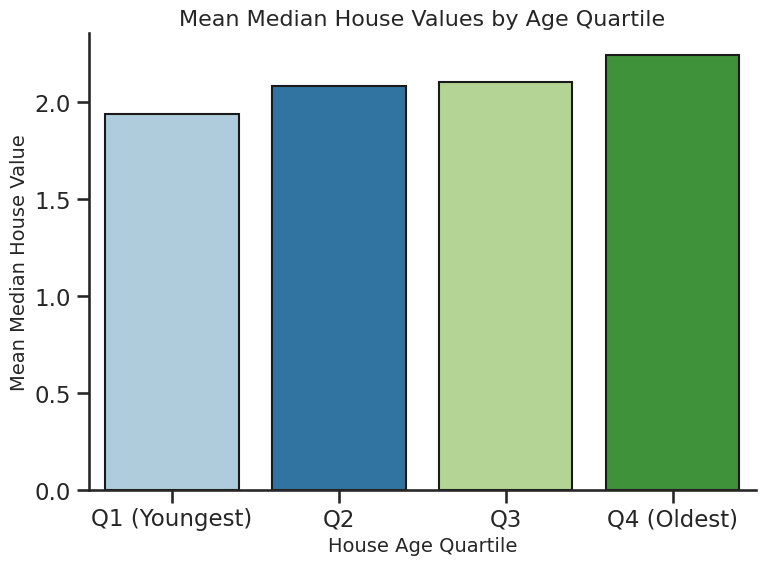

In [148]:

# Calculate mean house values for each quartile
quartile_means = filtered_df.groupby('Age_Quartile', observed=True)['MedHouseVal'].mean()

# Barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=quartile_means.index, y=quartile_means.values, hue=quartile_means.index, palette="Paired", edgecolor="k")
plt.title("Mean Median House Values by Age Quartile", fontsize=16)
plt.xlabel("House Age Quartile", fontsize=14)
plt.ylabel("Mean Median House Value", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()
